In [1]:
from IPython.display import Image
Image(url="https://i.ytimg.com/vi/lwfIYwl-lT8/maxresdefault.jpg")

# Description Of The Dataset¶


**VARIABLE DESCRIPTIONS: survival - Survival (0 = No; 1 = Yes) pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd) name - Name sex - Sex age - Age sibsp - Number of Siblings/Spouses Aboard parch - Number of Parents/Children Aboard ticket - Ticket Number fare - Passenger Fare cabin - Cabin embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)**  

**Pclass is a proxy for socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower**  

**With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored. The following are the definitions used for sibsp and parch.**  

**Sibling : Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic Spouse : Husband or Wife of Passenger Aboard   Titanic (Mistresses and Fiances Ignored) Parent : Mother or Father of Passenger Aboard Titanic Child : Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic**

# The questions we have
**What questions would you have if you were a journalist a you just got the date about the passengers on the titanic?  
Who were the people on board?  
Who survived?  
Who did not survive and why?  
What are the survival rates for men, woman and children?  
Is our assumption that more rich people survived correct or not?  
And of course: can we predict who survived?**


# Wrangling Phase

**(i) Data Acquisition**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [3]:
passengerinfo = pd.read_csv('titanic-data.csv')

In [4]:
passengerinfo.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Finding the total passengers on board
total_passenger = len(passengerinfo.PassengerId)

**(ii)Data Cleaning**

In [6]:
passengerinfo.dropna().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [7]:
total_passenger 


891

In [8]:
#Finding the non missing rows
nonmissingrows = len(passengerinfo.dropna())
missingdatarows = total_passenger - nonmissingrows
print ' {}  = {} '.format('Rows with missing data', missingdatarows)
                          
#Percentage of missing data
percentmissing_data = 100 - len(passengerinfo.dropna()) * 1.0/total_passenger * 100       
print ' {} = {} '.format('% of missing Data ',np.around(percentmissing_data,decimals = 2))                          

 Rows with missing data  = 708 
 % of missing Data  = 79.46 


In [9]:
#Find missing cabin data rows
missing_cabin_data_rows = len(passengerinfo['Cabin']) - passengerinfo['Cabin'].count()
print ' {} = {}'.format('No. of rows with missing cabin data ',missing_cabin_data_rows)

#Find missing age data rows
missing_age_data_rows = len(passengerinfo['Age']) - passengerinfo['Age'].count()
print ' {} = {}'.format('No. of rows with missing age data',missing_age_data_rows)

 No. of rows with missing cabin data  = 687
 No. of rows with missing age data = 177



As 708/891 (i.e. close to 80%) of the rows contain some missing data, we cannot remove all of them. Moreover, most of this missing data is Cabin data of the passenger, so it won't affect critical analysis

# Exploration Phase

** General Statistics Of Data**

In [10]:
passengerinfo.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the above data, we can see:  
  Max aged passenger = 80yrs.  
  Min aged passenger = 0.42yrs.  
  Avg age of passenger = 29.69 yrs.  
  Max passenger fare =  $ 512.32.
  Min passenger fare =  $ 0.00.
  

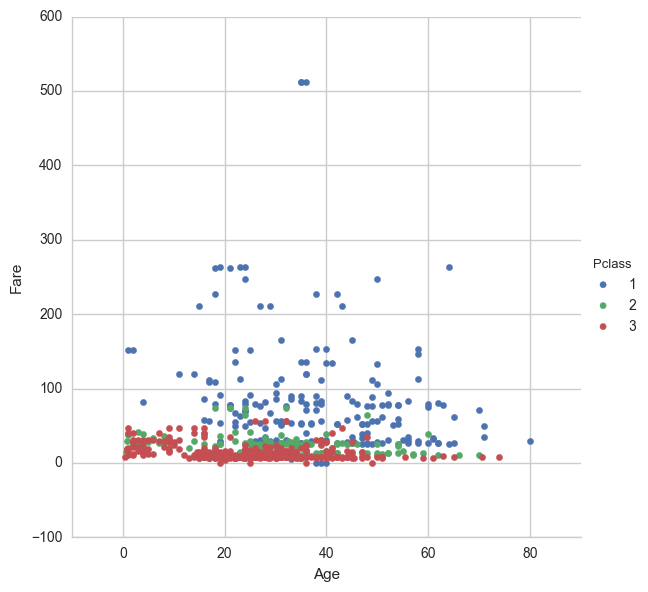

In [11]:
j=sns.FacetGrid(passengerinfo, hue="Pclass", size=6)
j.map(plt.scatter,"Age","Fare")
j.add_legend()

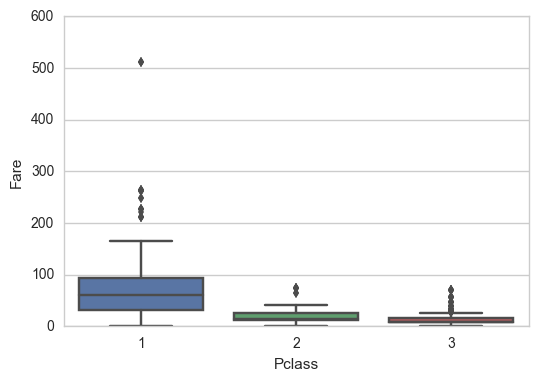

In [13]:
sns.boxplot("Pclass","Fare",data=passengerinfo)

As we can see from the two previous graphs, the distribution of the fare is less spread for the class 2 and 3 than the class 1.

In [11]:
#Defining a percentage function for calculating percentage
def calculate_percentage(val, total, format_percent = False):
    """Calculates the percentage of a value over a total"""
    percent = np.divide(val, total, dtype=float)
    if format_percent:
        percent = as_percent(percent)
    return percent



In [12]:
#Find number of male and female passengers
female_pass = (passengerinfo[passengerinfo['Sex'] == 'female'])
print ' {} = {}'.format('Number of female passenger:',len(female_pass))
male_pass = (passengerinfo[passengerinfo['Sex'] == 'male'])
print ' {} = {}'.format('Number of male passenger:',len(male_pass))

#Percentage of male and female passenger
percent_female = calculate_percentage(len(female_pass),total_passenger)*100
percent_male = calculate_percentage(len(male_pass),total_passenger)*100
print '{} = {}'.format('% female passenger',np.around(percent_female,decimals = 2))
print '{} = {}'.format('% male passenger',np.around(percent_male,decimals = 2))

 Number of female passenger: = 314
 Number of male passenger: = 577
% female passenger = 35.24
% male passenger = 64.76


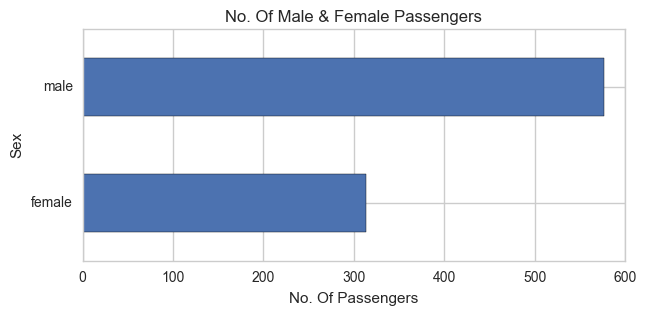

In [13]:
pass_gender = passengerinfo.groupby('Sex')
sex = pass_gender.size()
my_plot = sex.plot(kind='barh', title="No. Of Male & Female Passengers", figsize=(7, 3))
my_plot.set_xlabel("No. Of Passengers")

Therefore, the no.of men (64.76%) on board Titanic far exceeded the no. of women (35.24%).

# (1)What role did a passenger's gender play in his/her survival?

In [14]:
survivors = passengerinfo[passengerinfo['Survived'] == True]
non_survivors=passengerinfo[passengerinfo['Survived'] == False]

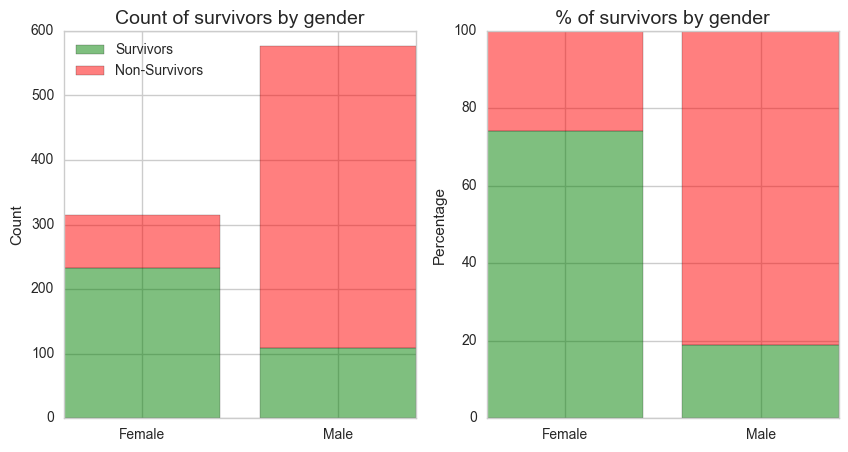

In [15]:
survivors_gender = survivors.groupby(['Sex']).size().values
non_survivors_gender = non_survivors.groupby(['Sex']).size().values
# calculate totals for percentates
totals = survivors_gender + non_survivors_gender

# use calculate_percentage_function to calculate percentage of the total
data1_percentages = calculate_percentage(survivors_gender, totals)*100 
data2_percentages = calculate_percentage(non_survivors_gender, totals)*100 

gender_categories = ['Female', 'Male']

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# plot chart for count of survivors by class
ax1.bar(range(len(survivors_gender)), survivors_gender, label='Survivors', alpha=0.5, color='g')
ax1.bar(range(len(non_survivors_gender)), non_survivors_gender, bottom=survivors_gender, label='Non-Survivors', alpha=0.5, color='r')
plt.sca(ax1)
plt.xticks([0.4, 1.4], gender_categories )
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Count of survivors by gender",fontsize=14)
plt.legend(loc='upper left')

# plot chart for percentage of survivors by class
ax2.bar(range(len(data1_percentages)), data1_percentages, alpha=0.5, color='g')
ax2.bar(range(len(data2_percentages)), data2_percentages, bottom=data1_percentages, alpha=0.5, color='r')
plt.sca(ax2)
plt.xticks([0.4, 1.4],  gender_categories)
ax2.set_ylabel("Percentage")
ax2.set_xlabel("")
ax2.set_title("% of survivors by gender",fontsize=14)


From these stats, we can see that the no. of surviving males is far less than the no. of surviving females, regardless of the fact that the no. of males far exceeded the females in the first place. I think this was due to the fact that during the evacuation process of RMS Titanic, the women, children and elderly were the first to board the lifeboats, with any remaining free spaces for men. 

# (2)What role did a passenger's socio-economic class play in his/her survival?¶


In [16]:
#Survival according to class

#Number of passenger beloning to first,second and third class
num_1class = len(passengerinfo[passengerinfo['Pclass'] == 1])
num_2class = len(passengerinfo[passengerinfo['Pclass'] == 2])
num_3class = len(passengerinfo[passengerinfo['Pclass'] == 3])

#Number of passngers who survived belonging to first,second and third class
num_1class_survived = len(passengerinfo[(passengerinfo['Pclass'] == 1) & (passengerinfo['Survived'] == True)])
num_2class_survived = len(passengerinfo[(passengerinfo['Pclass'] == 2) & (passengerinfo['Survived'] == True)])
num_3class_survived = len(passengerinfo[(passengerinfo['Pclass'] == 3) & (passengerinfo['Survived'] == True)])

num_of_1class_who_didntsurvive= num_1class-num_1class_survived
num_of_2class_who_didntsurvive= num_2class-num_2class_survived 
num_of_3class_who_didntsurvive= num_3class-num_3class_survived

print '{} = {}'.format('num_of_fclass', num_1class)
print '{} = {}'.format('num_of_sclass', num_2class)
print '{} = {}'.format('num_of_tclass', num_3class)
print '{} = {}'.format('num_of_fclass_who_survived', num_1class_survived)
print '{} = {}'.format('num_of_sclass_who_survived', num_2class_survived)
print '{} = {}'.format('num_of_tclass_who_survived', num_3class_survived)
print '{} = {}'.format('num_of_fclass_who_dintsurvive ', num_of_1class_who_didntsurvive )
print '{} = {}'.format('num_of_sclass_who_dintsurvive',  num_of_2class_who_didntsurvive)
print '{} = {}'.format('num_of_tclass_who_dintsurvive', num_of_3class_who_didntsurvive)


##Finding percentages of people belonging to the first, second, third class who did/did not survive

percent_1class_who_survived = calculate_percentage(num_1class_survived,num_1class )*100
percent_2class_who_survived = calculate_percentage(num_2class_survived,num_2class )*100
percent_3class_who_survived = calculate_percentage(num_3class_survived,num_3class )*100

print '{} = {}'.format('percent_fclass_who_survived', percent_1class_who_survived)
print '{} = {}'.format('percent_sclass_who_survived', percent_2class_who_survived)
print '{} = {}'.format('percent_tclass_who_survived', percent_3class_who_survived)


num_of_fclass = 216
num_of_sclass = 184
num_of_tclass = 491
num_of_fclass_who_survived = 136
num_of_sclass_who_survived = 87
num_of_tclass_who_survived = 119
num_of_fclass_who_dintsurvive  = 80
num_of_sclass_who_dintsurvive = 97
num_of_tclass_who_dintsurvive = 372
percent_fclass_who_survived = 62.962962963
percent_sclass_who_survived = 47.2826086957
percent_tclass_who_survived = 24.2362525458


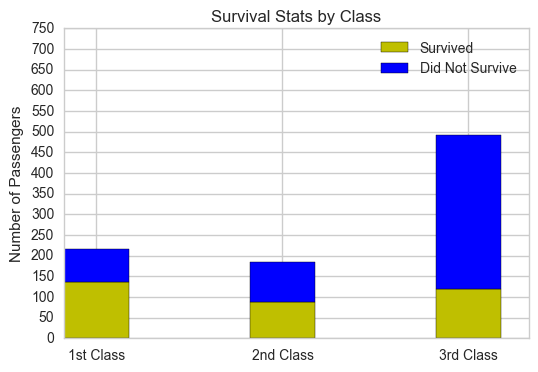

In [17]:
##Plotting percentages of people belonging to the first, second, third class who did/did not survive
##Plotting percentages of people belonging to the first, second, third class who did/did not survive
import numpy as np
import matplotlib.pyplot as plt

N = 3
survivedMeans = (num_1class_survived, num_2class_survived, num_3class_survived)
notsurvivedMeans = ((num_1class - num_1class_survived), (num_2class - num_2class_survived), (num_3class - num_3class_survived))

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, survivedMeans, width, color='y')
p2 = plt.bar(ind, notsurvivedMeans, width, color='b', bottom=survivedMeans)

plt.ylabel('Number of Passengers')
plt.title('Survival Stats by Class')
plt.xticks(ind + width/2, ('1st Class', '2nd Class', '3rd Class'))
plt.yticks(np.arange(0, 800, 50))
plt.legend((p1[0], p2[0]), ('Survived', 'Did Not Survive'))

plt.show()


It is evident from the plot that the percentage of surviving 1st class passengers was greater than those of 2nd and 3rd class. This probably resulted from a bias given to passengers belonging to higher socio-economic classes during the boarding of the rescue boats. The most affected were the 3rd class passengers with a survival rate of less than 1 out of 4.

# (3)Did being a women passenger of a higher socio-economic status increase a passenger's chances of survival?¶


In [18]:
## Finding number of males and females belonging to different classes 
class1_females = len(passengerinfo[(passengerinfo['Pclass'] ==1) & (passengerinfo['Sex'] == "female")])
class1_males = len(passengerinfo[(passengerinfo['Pclass'] ==1) & (passengerinfo['Sex'] == "male")])
class2_females = len(passengerinfo[(passengerinfo['Pclass'] ==2) & (passengerinfo['Sex'] == "female")])
class2_males = len(passengerinfo[(passengerinfo['Pclass'] ==2) & (passengerinfo['Sex'] == "male")])
class3_females = len(passengerinfo[(passengerinfo['Pclass'] ==3) & (passengerinfo['Sex'] == "female")])
class3_males = len(passengerinfo[(passengerinfo['Pclass'] ==3) & (passengerinfo['Sex'] == "male")])

surviving_class1_females = len(passengerinfo[(passengerinfo['Pclass'] == 1) & (passengerinfo['Survived'] == 1) & (passengerinfo['Sex']=="female")])
surviving_class1_males = len(passengerinfo[(passengerinfo['Pclass'] == 1) & (passengerinfo['Survived'] == 1) & (passengerinfo['Sex']=="male")])
surviving_class2_females = len(passengerinfo[(passengerinfo['Pclass'] == 2) & (passengerinfo['Survived'] == 1) & (passengerinfo['Sex']=="female")])
surviving_class2_males = len(passengerinfo[(passengerinfo['Pclass'] == 2) & (passengerinfo['Survived'] == 1) & (passengerinfo['Sex']=="male")])
surviving_class3_females = len(passengerinfo[(passengerinfo['Pclass'] == 3) & (passengerinfo['Survived'] == 1) & (passengerinfo['Sex']=="female")])
surviving_class3_males = len(passengerinfo[(passengerinfo['Pclass'] == 3) & (passengerinfo['Survived'] == 1) & (passengerinfo['Sex']=="male")])

## Finding percentages of males and females belonging to different classes 
percent_class1_females = surviving_class1_females*1.0/class1_females*100
percent_class1_males = surviving_class1_males*1.0/class1_males*100
percent_class2_females = surviving_class2_females*1.0/class2_females*100
percent_class2_males = surviving_class2_males*1.0/class2_males*100
percent_class3_females = surviving_class3_females*1.0/class3_females*100
percent_class3_males = surviving_class3_males*1.0/class3_males*100

print '{} = {} %'.format('% of surviving 1st Class Females', np.around(percent_class1_females, decimals=2))
print '{} = {} %'.format('% of surviving 1st Class Males', np.around(percent_class1_males, decimals=2))
print '{} = {} %'.format('% of surviving 2nd Class Females', np.around(percent_class2_females, decimals=2))
print '{} = {} %'.format('% of surviving 2nd Class Males', np.around(percent_class2_males, decimals=2))
print '{} = {} %'.format('% of surviving 3rd Class Females', np.around(percent_class3_females, decimals=2))
print '{} = {} %'.format('% of surviving 3rd Class Males', np.around(percent_class3_males, decimals=2))

% of surviving 1st Class Females = 96.81 %
% of surviving 1st Class Males = 36.89 %
% of surviving 2nd Class Females = 92.11 %
% of surviving 2nd Class Males = 15.74 %
% of surviving 3rd Class Females = 50.0 %
% of surviving 3rd Class Males = 13.54 %


Populating the interactive namespace from numpy and matplotlib


C:\Users\abc\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


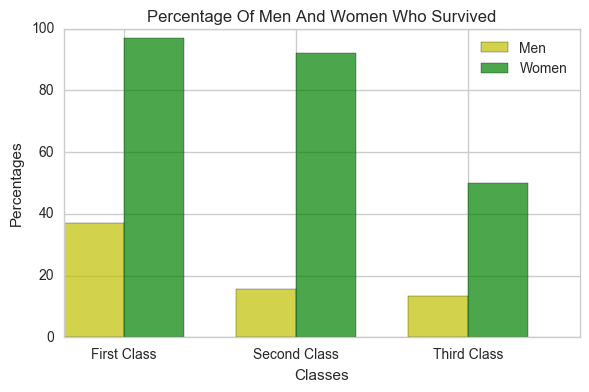

In [19]:
## Plotting percentages of males, females belonging to different classes 
import numpy as np
import matplotlib.pyplot as plt
%pylab inline


n_groups = 3
means_men = (percent_class1_males, percent_class2_males, percent_class3_males)
means_women = (percent_class1_females, percent_class2_females, percent_class3_females)


fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.7
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, means_men, bar_width,
                 alpha=opacity,
                 color='y',
                 yerr=0,
                 error_kw=error_config,
                 label='Men')
rects2 = plt.bar(index + bar_width, means_women, bar_width,
                 alpha=opacity,
                 color='g',
                 yerr=0,
                 error_kw=error_config,
                 label='Women')

plt.xlabel('Classes')
plt.ylabel('Percentages')
plt.title('Percentage Of Men And Women Who Survived')
plt.xticks(index + bar_width, ('First Class', 'Second Class', 'Third Class'))
plt.legend()

plt.tight_layout()
plt.show()

From here, we can conclude % 1st Class Women Survivors > % 2nd Class Women Survivors > % 3rd Class Women Survivors , and % 1st Class Men Survivors > % 2nd Class Men Survivors > % 3rd Class Men Survivors


# (4)Did travelling with family/companion affect a passenger's survival?


In [20]:
## Number of passengers who were travelling with a companion/family
not_alone = (passengerinfo[(passengerinfo['SibSp']>0) | (passengerinfo['Parch']>0)])

## Number of passengers who were travelling alone
alone = (passengerinfo[(passengerinfo['SibSp']==0) & (passengerinfo['Parch']==0)])

not_alone_survived = (passengerinfo[((passengerinfo['SibSp']>0) | (passengerinfo['Parch']>0)) & passengerinfo['Survived']])
alone_survived = (passengerinfo[((passengerinfo['SibSp']==0) & (passengerinfo['Parch']==0)) & passengerinfo['Survived']])

## Percentages of passengers who were travelling alone/with company who survived/did not survive
percent_not_alone_survived = len(not_alone_survived)* 1.0/len(not_alone)*100
percent_alone_survived = len(alone_survived)* 1.0/len(alone)*100

print '{} = {} %'.format('Survival % Of Passengers travelling with company', np.around(percent_not_alone_survived, decimals=2))
print '{} = {} %'.format('Survival % Of Passengers travelling alone', np.around(percent_alone_survived, decimals=2))

Survival % Of Passengers travelling with company = 50.56 %
Survival % Of Passengers travelling alone = 30.35 %


Populating the interactive namespace from numpy and matplotlib


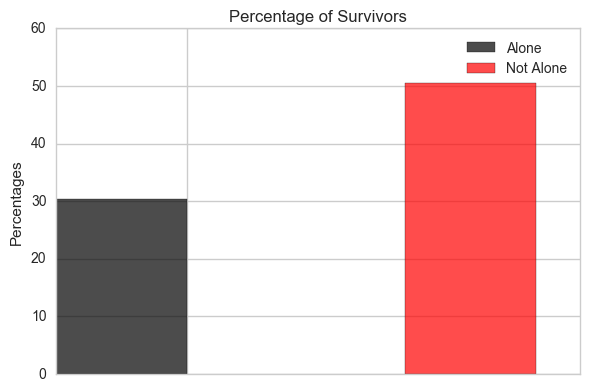

In [21]:
## Function to plot a graph of input alone and not alone
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%pylab inline


n_groups = 1
d=np.arange(0, 70, 10)
means_men = (percent_alone_survived)
means_women = (percent_not_alone_survived)
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.7
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, means_men, bar_width,
                     alpha=opacity,
                     color='black',
                     yerr=0,
                     error_kw=error_config,
                     label='Alone')

rects2 = plt.bar(index +0.5 + bar_width, means_women, bar_width,
                     alpha=opacity,
                     color='red',
                     yerr=0,
                     error_kw=error_config,
                     label='Not Alone')

plt.xlabel('')
plt.ylabel('Percentages')
plt.title('Percentage of Survivors')
plt.xticks(index + bar_width, (''))
plt.legend()
plt.yticks(d)
plt.tight_layout()
plt.show()
    

Clearly, passengers who travelled with family or a companion had a higher chance of survival than those who travelled alone. Travelling with someone who could help you to safety would definitely weigh in favour of those travelling with company.


# (5)What role did a passenger's age play in his/her survival?


In [22]:
## Finding the number of children , adults and elderly who survived
no_of_children=len(passengerinfo[passengerinfo['Age'] < 18])
no_of_adults=len(passengerinfo[(passengerinfo['Age'] >= 18) & (passengerinfo['Age'] <60 )])
no_of_elderly=len(passengerinfo[passengerinfo['Age'] >= 60])

print'{} = {}'.format('No. of children',no_of_children)
print'{} = {}'.format('No. of adults',no_of_adults)
print'{} = {}'.format('No. of elderly',no_of_elderly)

#Finding people who survived according to age group

no_children_survived=len(passengerinfo[(passengerinfo['Age']<18) & (passengerinfo['Survived'] == 1)])
no_adult_survived=len(passengerinfo[(passengerinfo['Age'] >= 18) & (passengerinfo['Age'] <60 ) & (passengerinfo['Survived'] == 1)])
no_elderly_survived=len(passengerinfo[(passengerinfo['Age'] >= 60) & (passengerinfo['Survived'] == 1)])

print'{} = {}'.format('No of children who survived',no_children_survived)
print'{} = {}'.format('No of adult who survived',no_adult_survived)
print'{} = {}'.format('No of elderly who survived',no_elderly_survived)

##Finding percentages of children and adults who survived
percent_children_who_survived=calculate_percentage(no_children_survived,no_of_children)*100
percent_adult_who_survived=calculate_percentage(no_adult_survived,no_of_adults)*100
percent_elderly_who_survived=calculate_percentage(no_elderly_survived,no_of_elderly)*100



print'{} = {}'.format('% of children who survived',percent_children_who_survived)
print'{} = {}'.format('% of adult who survived',percent_adult_who_survived)
print'{} = {}'.format('% of elderly who survived',percent_elderly_who_survived)


                 

                               

No. of children = 113
No. of adults = 575
No. of elderly = 26
No of children who survived = 61
No of adult who survived = 222
No of elderly who survived = 7
% of children who survived = 53.982300885
% of adult who survived = 38.6086956522
% of elderly who survived = 26.9230769231


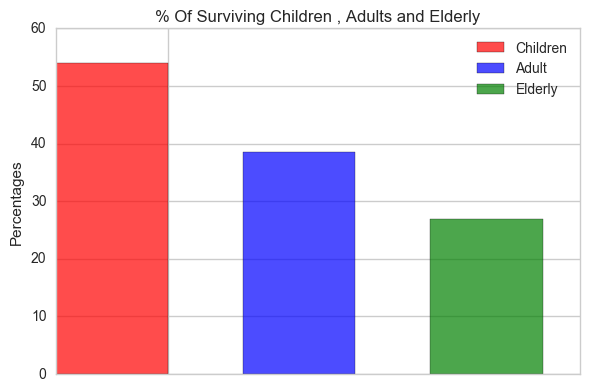

In [23]:
n_groups = 1
d=np.arange(0, 70, 10)
means_children = (percent_children_who_survived)
means_adult = (percent_adult_who_survived)
means_elderly= (percent_elderly_who_survived)
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.7
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, means_children, bar_width,
                     alpha=opacity,
                     color='red',
                     yerr=0,
                     error_kw=error_config,
                     label='Children')

rects2 = plt.bar(index + 0.2 + bar_width, means_adult, bar_width,
                     alpha=opacity,
                     color='blue',
                     yerr=0,
                     error_kw=error_config,
                     label='Adult')
rects2 = plt.bar(index +0.7 + bar_width, means_elderly, bar_width,
                     alpha=opacity,
                     color='green',
                     yerr=0,
                     error_kw=error_config,
                     label='Elderly')


plt.xlabel('')
plt.ylabel('Percentages')
plt.title('% Of Surviving Children , Adults and Elderly')
plt.xticks(index + bar_width, (''))
plt.legend()
plt.yticks(d)
plt.tight_layout()
plt.show()

From these stats, it is evident that more percentage of children (age < 18) survived this disaster than adults and elderly. This might also result from the fact that ladies and children were the first to be evacuated in lifeboats when the ship started sinking.


**Conclusion**  
(i) The no. of surviving females (74.20%) far exceeded the no. of surviving males (18.89%) aboard RMS Titanic.  
(ii) Similarly, the no. of children surviving the disaster (53.98%) significantly exceeded the no. of adults and elderly (38.10%).  
(iii) Significantly more 1st Class passengers (62.96%) survived compared to 2nd Class (47.28%) and 3rd Class (24.24%) passengers.  
(iv) Passengers travelling with company had a higher survival rate (50.56%) than those who were travelling alone (30.35%).

**References **

https://www.kaggle.com/c/titanic/data https://en.wikipedia.org/wiki/Women_and_children_first http://pbpython.com/simple-graphing-pandas.html http://pandas.pydata.org/pandas-docs/stable/visualization.html